In [1]:
import pandas as pd
import numpy as np
import os
import sys
from nilearn.plotting import plot_design_matrix
sys.path.append('..')
from utils.analysis import est_c_vifs, est_vifs, est_efficiency

In [2]:
def load_dms(first_lvl_dir):
    # Get list of subject directories
    subjects = [d for d in os.listdir(first_lvl_dir) if d.startswith('sub-')]
    subjects.sort()

    DMs = {}
    # walk through each subject and run to load design matrices
    for sub in subjects:
        DMs[sub] = {}
        for run in [f'run-{i}' for i in range(1, 4)]:
            design_matrix_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_design_matrix.csv')
            column_names_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_column_names.txt')
            if os.path.exists(design_matrix_path) and os.path.exists(column_names_path):
                with open(column_names_path, 'r') as f:
                    col_names = [line.strip() for line in f]
                DMs[sub][run] = pd.read_csv(design_matrix_path, names=col_names, header=None)
    return DMs

In [3]:
def cVIFs_summary(DMs, n_regs = 7):
    sample_dm = next(iter(next(iter(DMs.values())).values()))
    contrasts = {col:col for col in sample_dm.columns[:n_regs]}
    cVIFs = []
    for _, runs in DMs.items():
        for _, dm in runs.items():
            cVIFs.append(est_c_vifs(dm, contrasts))
    runs = [f'run-{i}' for i in range(1, 4)]
    subjects = list(DMs.keys())
    index = [(sub, run) for sub in subjects for run in runs]
    df_vifs = pd.DataFrame(cVIFs, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
    return df_vifs.describe()

In [4]:
def eff_summary(DMs, n_regs = 7):
    sample_dm = next(iter(next(iter(DMs.values())).values()))
    contrasts = {col:col for col in sample_dm.columns[:n_regs]}
    effs = []
    for _, runs in DMs.items():
        for _, dm in runs.items():
            effs.append(est_efficiency(dm, contrasts))
    runs = [f'run-{i}' for i in range(1, 4)]
    subjects = list(DMs.keys())
    index = [(sub, run) for sub in subjects for run in runs]
    df_effs = pd.DataFrame(effs, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
    return df_effs.describe()

In [5]:
def VIFs_summary(DMs, n_regs = 7):
    sample_dm = next(iter(next(iter(DMs.values())).values()))
    regressors = sample_dm.columns[:n_regs]
    VIFs = []
    for _, runs in DMs.items():
        for _, dm in runs.items():
            VIFs.append(est_vifs(dm, regressors))
    runs = [f'run-{i}' for i in range(1, 4)]
    subjects = list(DMs.keys())
    index = [(sub, run) for sub in subjects for run in runs]
    df_vifs = pd.DataFrame(VIFs, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
    return df_vifs.describe()

# First level models
- GLM1: all events, PM only on first stimulus presentation
- GLM1b: exclude trials for which the first stimulus is 1/8
- GLM2: all events, PM on both stimuli
- GLM2b: exclude trials for which the first stimulus is 1/8
- GLM2b': exclude trials for which either stimuli is 1/8

In [6]:
first_lvl_dir = '/home/ubuntu/data/learning-habits/spm_format_20250603/outputs/'
models = ['glm1_2025-09-15-04-32',
          'glm1b_exclude_2025-09-15-05-21',
          'glm2_2025-09-15-06-08',
          'glm2b_exclude_2025-09-15-08-21',
          'glm2b_exclude2_2025-09-15-09-06']

In [8]:
model_dirs = [os.path.join(first_lvl_dir, model) for model in models]

## GLM1

In [37]:
DMs_glm1 = load_dms(model_dirs[0])
VIFs_summary(DMs_glm1)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1),Sn(1) R1
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,12.231675,1.734967,1.942362,8.861353,47.001347,13.206291,3.127216
std,2.299911,0.440011,0.369378,1.800964,5.264155,1.271263,1.144758
min,8.056068,1.086824,1.161596,5.694975,35.244444,10.720632,1.414457
25%,10.708470,1.345585,1.669989,7.628078,43.618882,12.290977,2.305588
50%,11.648661,1.671943,1.878137,8.619238,46.406040,13.048884,2.853800
75%,13.626631,2.034917,2.177597,9.850765,50.240561,14.120530,3.601520
max,19.814181,2.933524,2.957743,15.748894,62.938901,17.931005,7.896934


In [38]:
eff_summary(DMs_glm1)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1),Sn(1) R1
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.084402,0.612424,0.533379,0.117266,0.021539,0.076402,0.356661
std,0.014533,0.147283,0.101034,0.022611,0.002387,0.007168,0.110171
min,0.050469,0.340887,0.338096,0.063497,0.015888,0.055769,0.126631
25%,0.073386,0.491426,0.459222,0.101515,0.019904,0.070819,0.277661
50%,0.085847,0.598111,0.532448,0.116020,0.021549,0.076635,0.350411
75%,0.093384,0.743172,0.598806,0.131095,0.022926,0.081361,0.433729
max,0.124130,0.920112,0.860884,0.175593,0.028373,0.093278,0.706985


## GLM1b

In [39]:
DMs_glm1b = load_dms(model_dirs[1])
VIFs_summary(DMs_glm1b)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1),Sn(1) first_stim_excl*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,16.597477,1.178005,1.328539,11.886019,49.627241,13.280107,10.337450
std,3.358924,0.102918,0.197152,2.769490,5.812404,1.276761,2.499572
min,10.053973,1.063698,1.051599,5.913146,36.963293,10.624233,4.547384
25%,14.173684,1.111447,1.178490,10.030425,45.867095,12.318561,8.632922
50%,16.020681,1.156574,1.274923,11.834031,49.252511,13.144555,9.885517
75%,18.552227,1.210517,1.434213,13.461572,52.932901,14.160415,11.937641
max,26.930413,1.777338,2.176355,25.540812,70.388134,17.981682,19.091960


In [40]:
eff_summary(DMs_glm1b)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1),Sn(1) first_stim_excl*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.062551,0.854306,0.767067,0.088737,0.020421,0.075975,0.102331
std,0.011797,0.063179,0.099209,0.021224,0.002357,0.007112,0.024718
min,0.037133,0.562639,0.459484,0.039153,0.014207,0.055612,0.052378
25%,0.053902,0.826093,0.697247,0.074286,0.018892,0.070619,0.083769
50%,0.062420,0.864622,0.784362,0.084502,0.020304,0.076077,0.101160
75%,0.070553,0.899728,0.848546,0.099697,0.021802,0.081178,0.115836
max,0.099463,0.940117,0.950932,0.169115,0.027054,0.094124,0.219907


## GLM2

In [41]:
DMs_glm2 = load_dms(model_dirs[2])
VIFs_summary(DMs_glm2, n_regs=8)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) second_stimxQval^1*bf(1),Sn(1) second_stimxHval^1*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,12.293878,2.536885,2.509630,9.128764,2.577963,2.544087,47.274500,13.252436
std,2.311828,0.670220,0.596269,1.897539,0.689640,0.655882,5.310236,1.271649
min,8.062907,1.471925,1.592870,5.697665,1.557993,1.510012,35.781044,10.763340
25%,10.763087,2.067859,2.035135,7.699845,2.079489,2.040574,43.840101,12.336251
50%,11.747244,2.327676,2.361878,8.980091,2.381062,2.367980,46.796917,13.091521
75%,13.684615,2.936075,2.870277,10.116371,2.972683,2.829650,50.589136,14.128590
max,19.846092,5.078428,4.428387,17.856513,4.427448,4.327524,62.939280,17.968285


In [42]:
eff_summary(DMs_glm2)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) second_stimxQval^1*bf(1),Sn(1) second_stimxHval^1*bf(1),Sn(1) response*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.083974,0.418857,0.419252,0.113930,0.414100,0.417205,0.021415
std,0.014455,0.097764,0.090958,0.022064,0.102384,0.097554,0.002374
min,0.050388,0.196911,0.225816,0.056002,0.225864,0.231079,0.015888
25%,0.073075,0.340595,0.348402,0.098850,0.336397,0.353409,0.019767
50%,0.085127,0.429627,0.423449,0.111357,0.419981,0.422301,0.021369
75%,0.092910,0.483592,0.491369,0.129873,0.480888,0.490058,0.022810
max,0.124025,0.679382,0.627798,0.175510,0.641851,0.662246,0.027948


## GLM2b

In [43]:
DMs_glm2b = load_dms(model_dirs[3])
VIFs_summary(DMs_glm2b, n_regs=9)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) second_stimxQval^1*bf(1),Sn(1) second_stimxHval^1*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1),Sn(1) first_stim_excl*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,16.696169,1.546868,1.613515,12.322889,2.171984,2.379076,50.035494,13.328035,10.398973
std,3.379988,0.314364,0.298431,2.918102,0.435609,0.477178,5.916845,1.278868,2.515356
min,10.063786,1.082719,1.143911,6.244020,1.271975,1.511077,37.005043,10.669625,4.575189
25%,14.250137,1.255756,1.350780,10.432210,1.808410,2.031777,46.234786,12.392162,8.673708
50%,16.133924,1.567570,1.608197,12.227010,2.114791,2.337496,49.603679,13.191678,9.964820
75%,18.673052,1.760146,1.807379,13.911454,2.489075,2.650541,53.491385,14.194330,12.033751
max,27.104206,2.552823,2.551102,26.461248,3.262365,3.971746,71.131186,18.025618,19.141133


In [44]:
eff_summary(DMs_glm2b)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) second_stimxQval^1*bf(1),Sn(1) second_stimxHval^1*bf(1),Sn(1) response*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.062184,0.673326,0.640423,0.085697,0.478767,0.436619,0.020260
std,0.011740,0.135973,0.114754,0.020647,0.094514,0.084167,0.002367
min,0.036895,0.391723,0.391987,0.037791,0.306526,0.251778,0.014059
25%,0.053553,0.568137,0.553289,0.071883,0.401758,0.377285,0.018695
50%,0.061981,0.637944,0.621814,0.081786,0.472876,0.427820,0.020160
75%,0.070175,0.796333,0.740314,0.095857,0.552972,0.492180,0.021629
max,0.099366,0.923601,0.874194,0.160153,0.786179,0.661779,0.027023


## GLM2b'

In [45]:
DMs_glm2bp = load_dms(model_dirs[4])
VIFs_summary(DMs_glm2bp, n_regs=10)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) second_stimxQval^1*bf(1),Sn(1) second_stimxHval^1*bf(1),Sn(1) response*bf(1),Sn(1) feedback*bf(1),Sn(1) first_stim_excl*bf(1),Sn(1) second_stim_excl*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,18.177567,1.267617,1.869887,18.784202,1.298663,1.893269,50.042042,13.673231,22.185073,13.715162
std,3.649822,0.156769,0.793225,3.675111,0.191727,0.785175,5.579538,1.357734,4.177597,2.944527
min,12.113758,1.081185,1.151287,10.127004,1.076259,1.098339,36.898313,10.736121,13.777435,8.360575
25%,15.684433,1.170599,1.335194,16.338063,1.181816,1.376422,46.217628,12.639033,19.221605,11.655363
50%,17.375472,1.234147,1.565822,18.761108,1.258980,1.590392,49.633026,13.599318,21.639181,13.482864
75%,20.389424,1.311857,2.220074,20.598683,1.343356,2.198107,53.905481,14.573086,24.984082,15.579542
max,29.076715,2.083473,6.500943,29.150008,2.849015,6.078342,66.576930,18.543436,37.727042,24.010640


In [46]:
eff_summary(DMs_glm2bp)

,Sn(1) first_stim*bf(1),Sn(1) first_stimxQval^1*bf(1),Sn(1) first_stimxHval^1*bf(1),Sn(1) second_stim*bf(1),Sn(1) second_stimxQval^1*bf(1),Sn(1) second_stimxHval^1*bf(1),Sn(1) response*bf(1)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.057054,0.798507,0.602452,0.055339,0.782505,0.594091,0.020230
std,0.010498,0.079959,0.173994,0.011300,0.089236,0.173389,0.002248
min,0.034392,0.479968,0.153824,0.034305,0.350999,0.164519,0.015020
25%,0.049045,0.762279,0.450437,0.048547,0.744404,0.454955,0.018551
50%,0.057553,0.810277,0.638642,0.053302,0.794294,0.628784,0.020148
75%,0.063759,0.854269,0.748957,0.061207,0.846157,0.726522,0.021637
max,0.082551,0.924911,0.868593,0.098746,0.929145,0.910466,0.027102


# Combined learning runs

In [55]:
models_comb = ['glm1_combined_2025-09-15-01-56',    
                'glm2_combined_2025-09-15-03-26']

model_comb_dirs = [os.path.join(first_lvl_dir, model) for model in models_comb]

In [51]:
def load_dms_comb(first_lvl_dir):
    # Get list of subject directories
    subjects = [d for d in os.listdir(first_lvl_dir) if d.startswith('sub-')]
    subjects.sort()

    DMs = {}
    # walk through each subject and run to load design matrices
    for sub in subjects:
        DMs[sub] = {}
        for run in ['learning', 'test']:
            design_matrix_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_design_matrix.csv')
            column_names_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_column_names.txt')
            if os.path.exists(design_matrix_path) and os.path.exists(column_names_path):
                with open(column_names_path, 'r') as f:
                    col_names = [line.strip() for line in f]
                DMs[sub][run] = pd.read_csv(design_matrix_path, names=col_names, header=None)
    return DMs

## GLM1

In [65]:
DMs_glm1_comb = load_dms_comb(model_comb_dirs[0])
DMs_glm2_comb = load_dms_comb(model_comb_dirs[1])

In [66]:
sample_dm = next(iter(next(iter(DMs_glm2_comb.values())).values()))

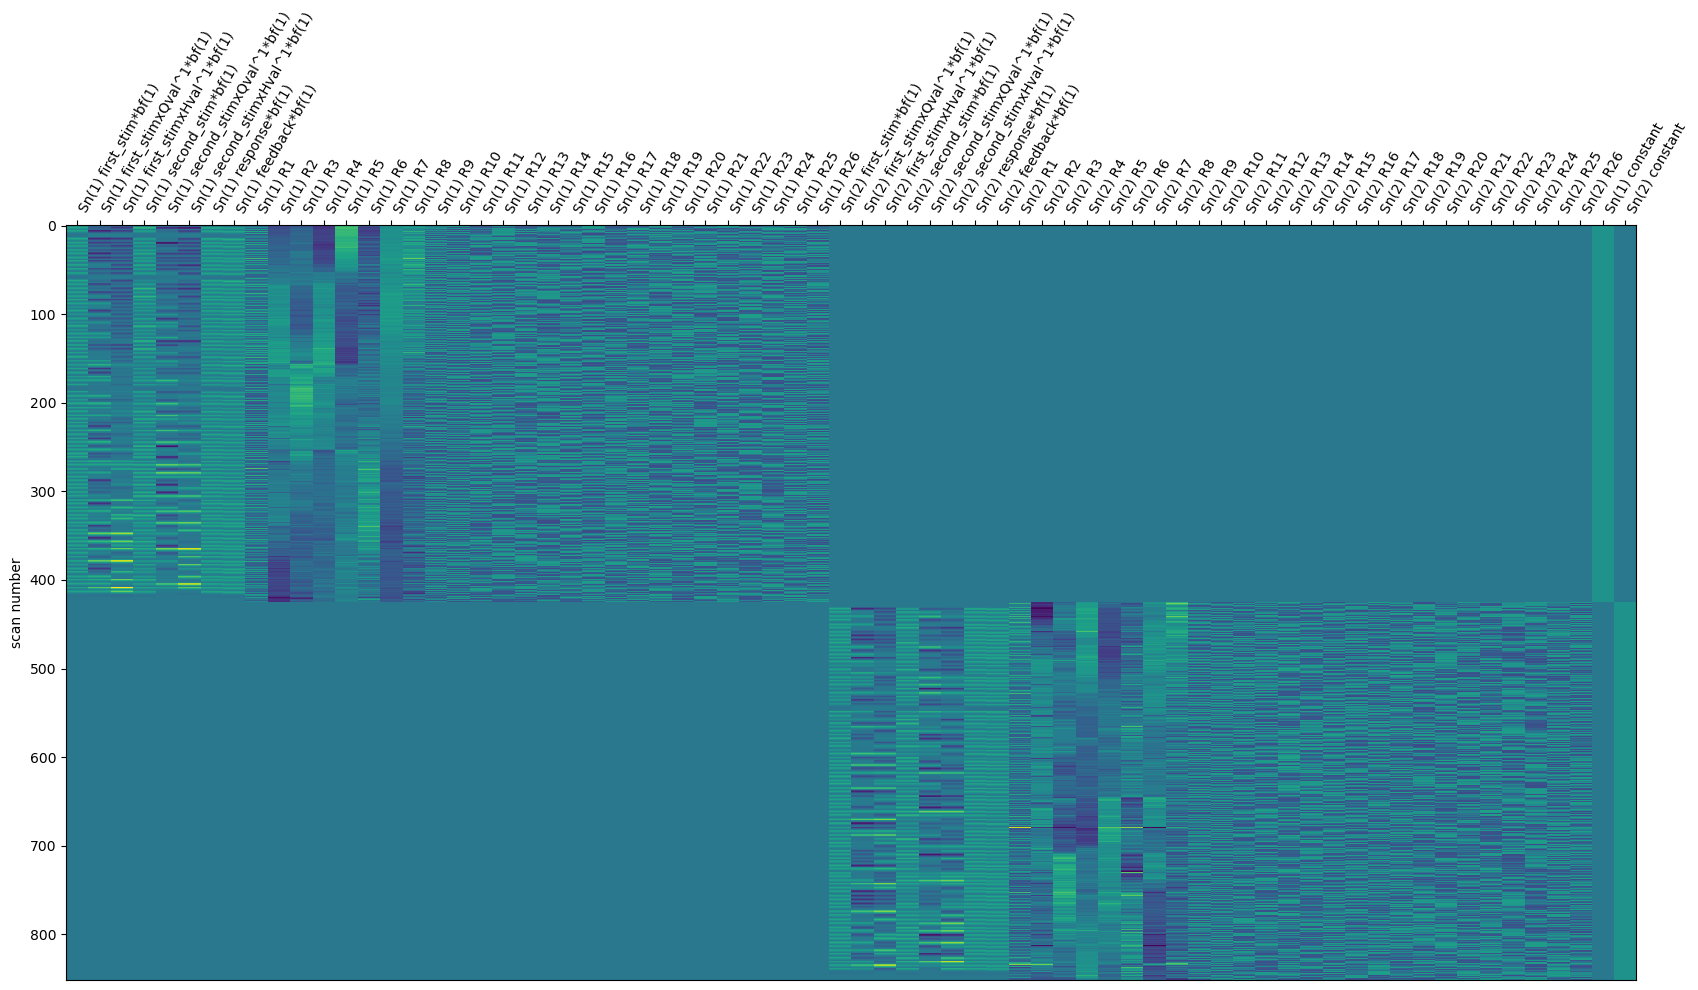

In [67]:
plot_design_matrix(sample_dm);

In [62]:
est_vifs(sample_dm, sample_dm.columns[:10])

{'Sn(1) first_stim*bf(1)': 19.53585972789433,
 'Sn(1) first_stimxQval^1*bf(1)': 1.7657815315116419,
 'Sn(1) first_stimxHval^1*bf(1)': 2.4012848932416557,
 'Sn(1) second_stim*bf(1)': 18.32748989916937,
 'Sn(1) response*bf(1)': 90.57556944537434,
 'Sn(1) feedback*bf(1)': 27.652532827638392,
 'Sn(1) R1': 5.659572813379101,
 'Sn(1) R2': 4.078883357742714,
 'Sn(1) R3': 2.4297214377487046,
 'Sn(1) R4': 14.3031082384699}

## GLM2

In [57]:
DMs_glm2_comb = load_dms_comb(model_comb_dirs[1])
